In [22]:
pip install ultralytics

In [23]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2

In [24]:
warnings.filterwarnings("ignore")
np.random.seed(12345)

%matplotlib inline

# Rest of your code goes here

!wandb disabled

W&B disabled.


In [25]:
INPUT_DIR = 'C:/Users/lenovo/Desktop/SA_project/Pre_train'
WORK_DIR = 'C:/Users/lenovo/Desktop/SA_project/results'
num_classes = 10
classes = ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

In [26]:
dict_file = {'train': os.path.join(INPUT_DIR, 'train'),
             'val': os.path.join(INPUT_DIR, 'valid'),
             'test': os.path.join(INPUT_DIR, 'test'),
             'nc': num_classes,
             'names': classes
            }

with open(os.path.join(WORK_DIR, 'data.yaml'), 'w+') as file:
    yaml.dump(dict_file, file)

In [27]:
class_idx = {str(i):classes[i] for i in range(num_classes)}

class_stat = {}
data_len = {}

for mode in ['train', 'valid', 'test']:

    class_count = {classes[i]:0 for i in range(num_classes)}

    path = os.path.join(INPUT_DIR, mode, 'labels')

    for file in os.listdir(path):

        with open(os.path.join(path, file)) as f:
            lines = f.readlines()

            for cls in set([line[0] for line in lines]):
                class_count[class_idx[cls]] += 1
                
    data_len[mode] = len(os.listdir(path))
    class_stat[mode] = class_count

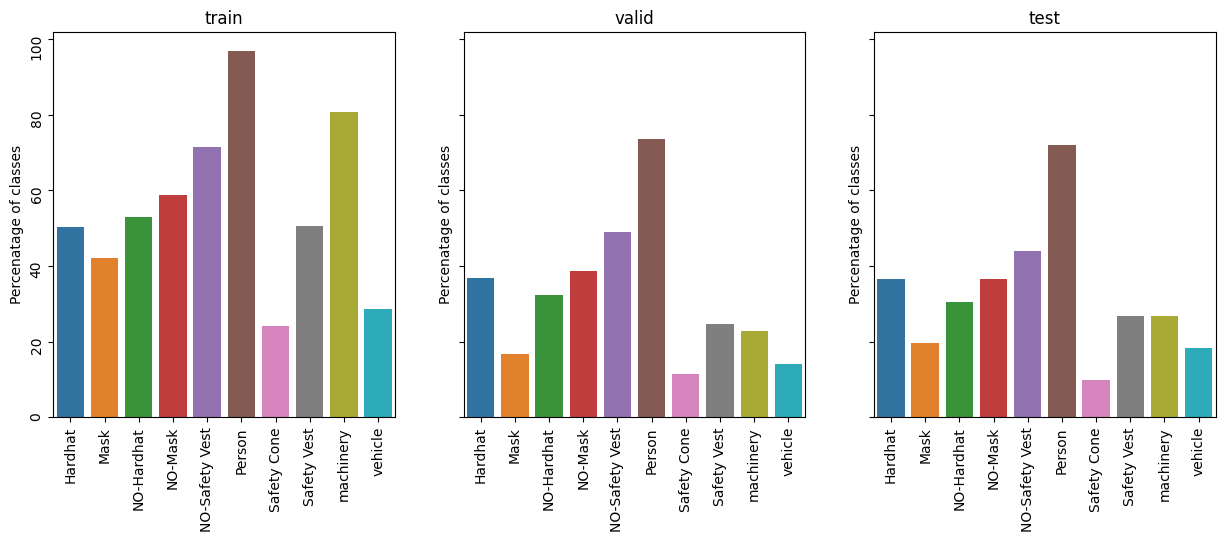

In [28]:
fig, ax = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for i, mode in enumerate(['train', 'valid', 'test']):
    sns.barplot(pd.DataFrame({mode:class_stat[mode]}).T/data_len[mode]*100, ax=ax[i])
    ax[i].set_title(mode)
    ax[i].tick_params(rotation=90)
    ax[i].set_ylabel('Percenatage of classes')
plt.show()

In [29]:
for mode in ['train', 'valid', 'test']:
    print(f'\nImage sizes in {mode} set:\n')
    img_size = 0
    for file in glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*')):
        image = Image.open(file)
        if image.size != img_size:
            print(f'\t{image.size}')
            img_size = image.size


Image sizes in train set:

	(640, 640)

Image sizes in valid set:

	(640, 640)

Image sizes in test set:

	(640, 640)


In [30]:
for mode in ['train', 'valid', 'test']:
    
    files =  glob.glob(os.path.join(INPUT_DIR, mode, 'images', '*'))
        
    print(f'{mode} set size: {len(files)}\n')

train set size: 2605

valid set size: 114

test set size: 82



In [31]:
model = YOLO('yolov5nu.pt')

In [32]:
model.train(data=os.path.join(WORK_DIR,'data.yaml'),
            task='detect',
            imgsz=640,
            epochs=50,
            batch=2,
            mode='train',
            name='yolov5n_v1_train')

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov5nu.pt, data=C:/Users/lenovo/Desktop/SA_project/results\data.yaml, epochs=50, patience=50, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov5n_v1_train, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fa


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/50         0G       1.33      2.016      1.478         27        640: 100%|██████████| 1303/1303 [49:25<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:50
                   all        114        697      0.532      0.426       0.42      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/50         0G      1.317      1.967       1.47         12        640: 100%|██████████| 1303/1303 [38:46<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:45
                   all        114        697      0.612      0.396      0.425      0.193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/50         0G      1.303      1.908       1.46         25        640: 100%|██████████| 1303/1303

      26/50         0G      1.151      1.396      1.333         17        640: 100%|██████████| 1303/1303 [40:04<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:44
                   all        114        697      0.713      0.585      0.625      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/50         0G      1.132      1.362      1.321          7        640: 100%|██████████| 1303/1303 [39:01<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 29/29 [00:43
                   all        114        697      0.728      0.575      0.633        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/50         0G      1.126      1.356      1.324          7        640: 100%|██████████| 1303/1303 [39:01<00:00,
                 Class     Images  Instances      Box(P         

In [1]:
cd

C:\Users\lenovo
